In [1]:
import os
os.getcwd()

'e:\\NYC-Housing-Pricing-Project\\Notebooks'

In [2]:
os.chdir('../')

In [3]:
import numpy as np
import pandas as pd

data=pd.read_csv("E:/Housing Prices data/311_Service_Requests_2022.csv")
data.head(5)

C:\Users\athar\AppData\Local\Temp\ipykernel_7840\2519608213.py:4: DtypeWarning: Columns (20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("E:/Housing Prices data/311_Service_Requests_2022.csv")


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,56415040,12/31/2022 11:59:25 PM,01/01/2023 12:24:01 AM,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,415 OCEAN PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.638927,-73.973250,"(40.63892746412587, -73.97325020454049)"
1,56418476,12/31/2022 11:59:13 PM,01/01/2023 12:26:51 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,602 WEST 184 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.851187,-73.932670,"(40.85118699615938, -73.93266992103403)"
2,56415364,12/31/2022 11:59:12 PM,01/01/2023 01:00:18 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,726 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.645124,-73.960077,"(40.64512411588355, -73.96007697831942)"
3,56414786,12/31/2022 11:59:04 PM,01/03/2023 07:49:56 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,2400 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.801435,-73.934432,"(40.80143454654757, -73.93443230896085)"
4,56414075,12/31/2022 11:58:52 PM,01/01/2023 12:29:43 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,1672 CORNELIA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699215,-73.906590,"(40.699214628010594, -73.90659036915068)"


In [4]:
data=data[['Created Date', 'Agency','Complaint Type', 'Descriptor', 'Incident Zip','Community Board', 'Borough',
       'Open Data Channel Type','Latitude', 'Longitude']]

In [5]:
(data.isna().sum()/len(data))*100

Created Date              0.000000
Agency                    0.000000
Complaint Type            0.000000
Descriptor                3.086683
Incident Zip              1.401868
Community Board           0.000000
Borough                   0.000000
Open Data Channel Type    0.000000
Latitude                  1.595631
Longitude                 1.595631
dtype: float64

In [6]:
data.dropna(inplace=True)

In [7]:
data['Created Date']=pd.to_datetime(
    data['Created Date'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'  # This ensures that problematic rows become NaT instead of crashing
)

data['Incident Zip']=data['Incident Zip'].astype(str).str.split('.').str[0]

In [8]:
data.dtypes

Created Date              datetime64[ns]
Agency                            object
Complaint Type                    object
Descriptor                        object
Incident Zip                      object
Community Board                   object
Borough                           object
Open Data Channel Type            object
Latitude                         float64
Longitude                        float64
dtype: object

In [9]:
data['Complaint Type'].unique()

house_related=['Electrical','Obstruction','Plumbing','DOF Property - Reduction Issue','Broken Parking Meter','Broken Muni Meter','APPLIANCE','Maintenance or Facility','Building/Use','GENERAL CONSTRUCTION','HEATING','General Construction/Plumbing','HEAT/HOT WATER','Consumer Complaint', 'DOOR/WINDOW','PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'ELECTRIC','Non-Residential Heat','FLOORING/STAIRS','Water System','Elevator']
unsanitary_related=['Unsanitary Animal Pvt Property','Standing Water','Street Sweeping Complaint','Food Poisoning','Dead Animal','Illegal Tree Damage','Residential Disposal Complaint','Dead Tree','Curb Condition','Electronics Waste Appointment''Lead','Snow','Dead/Dying Tree','Street Sign - Damaged','Root/Sewer/Sidewalk Condition','Food Establishment','Overgrown Tree/Branches','Missed Collection (All Materials)','Sanitation Condition','Damaged Tree','Request Large Bulky Item Collection','Rodent','Abandoned Vehicle','Derelict Vehicles','UNSANITARY CONDITION','Sewer','Dirty Condition', 'Illegal Dumping']
neighborhood_related=['Homeless Encampment','Drinking','Outdoor Dining','Smoking','Vending','Violation of Park Rule','Panhandling','Emergency Response Team (ERT)','Drug Activity','SAFETY','Illegal Fireworks','Encampment','Taxi Complaint','Graffiti','Homeless Person Assistance','Non-Emergency Police Matter','Street Light Condition','Street Condition' ,'Illegal Parking', 'Noise','Non-Emergency Police Matter']
pollution=['Hazardous Materials','Water Quality','Indoor Air Quality','Noise - Park','Air Quality','Noise - Helicopter','Noise - Street/Sidewalk','Noise - Residential','Noise - Vehicle','Noise - Commercial']
other=['NonCompliance with Phased Reopening','Vendor Enforcement','DOF Parking - Payment Issue','Street Sign - Missing','Other Enforcement','Traffic','SCRIE','Benefit Card Replacement','GENERAL','Literature Request','NONCONST','New Tree Request','For Hire Vehicle Complaint']

In [13]:
# --- CLASSIFICATION FUNCTION ---

def classify_complaint(complaint_type):
    ct = complaint_type.lower()

    # House-related
    for word in house_related:
        if word.lower() in ct:
            return "house_related"

    # Unsanitary-related
    for word in unsanitary_related:
        if word.lower() in ct:
            return "unsanitary_related"

    # Neighborhood
    for word in neighborhood_related:
        if word.lower() in ct:
            return "neighborhood_related"

    # Pollution
    for word in pollution:
        if word.lower() in ct:
            return "pollution"

    # Other
    for word in other:
        if word.lower() in ct:
            return "other"

    # If no match → unknown
    return "other_unknown"


# --- APPLY TO YOUR DATAFRAME (df) ---
data['category'] = data['Complaint Type'].apply(classify_complaint)


## Visualization 1

Map Categorized using complaint types

In [22]:
data['category'].unique()

array(['neighborhood_related', 'unsanitary_related', 'other',
       'other_unknown', 'house_related', 'pollution'], dtype=object)

In [27]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Filter out unwanted category
#df = data[data["category"] != "other_unknown"]

df = data[data["category"] != "other_unknown"]
df=df[0:1000]

# Stratified sampling (10% per category)
#sample_fraction = 0.05  # change this to any % you like
#df_sample = df.groupby("category", group_keys=False).apply(lambda x: x.sample(frac=sample_fraction, random_state=42))


# ------------------------------------------------
# 2. COLOR MAP FOR 5 CATEGORIES
# ------------------------------------------------
color_map = {
    "neighborhood_related": "red",
    "unsanitary_related": "blue",
    "house_related": "green",
    "pollution": "purple",
    "other": "orange"
}

# ------------------------------------------------
# 3. CREATE MAP CENTERED ON NYC
# ------------------------------------------------
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles="cartodbpositron")

# Cluster to improve performance
marker_cluster = MarkerCluster().add_to(m)

# ------------------------------------------------
# 4. ADD POINTS WITH HOVER TOOLTIP
# ------------------------------------------------
for _, row in df_sample.iterrows():
    tooltip = (
        f"Category: {row['category']}<br>"
        f"Complaint Type: {row['Complaint Type']}<br>"
        f"Descriptor: {row['Descriptor']}<br>"
        f"ZIP: {row['Incident Zip']}<br>"
        f"Borough: {row['Borough']}"
    )
    
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=4,
        color=color_map.get(row["category"], "gray"),
        fill=True,
        fill_opacity=0.7,
        tooltip=tooltip
    ).add_to(marker_cluster)

# ------------------------------------------------
# 5. SAVE OUTPUT
# ------------------------------------------------
m.save("nyc_311_interactive_map.html")
m


KeyboardInterrupt: 

## Visualization 2

Multiple bar char

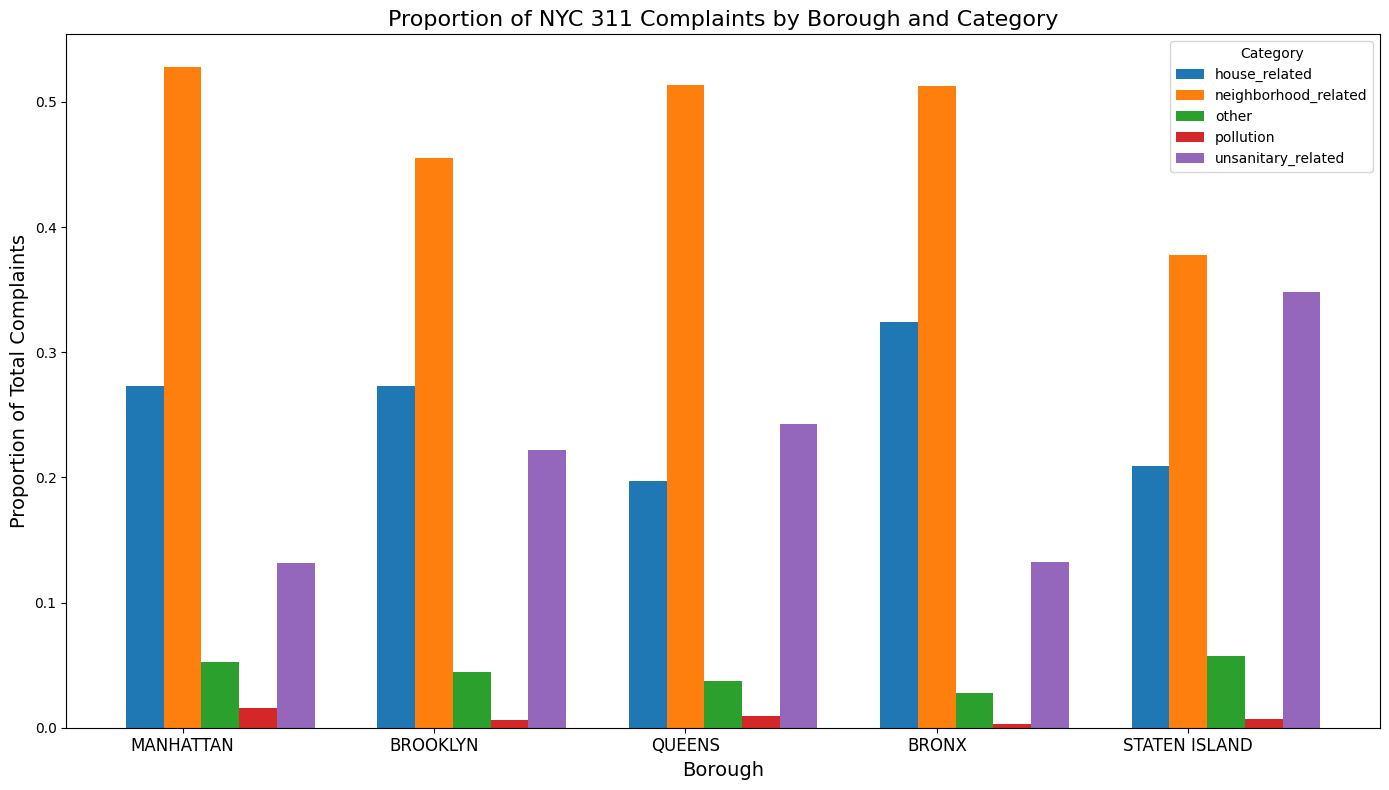

In [29]:

df = data[data["category"] != "other_unknown"]

# -------------------------------------------
# 2. Group data: count complaints by borough & category
# -------------------------------------------
grouped = df.groupby(["Borough", "category"]).size().unstack(fill_value=0)

# Ensure boroughs are in common NYC order
borough_order = ["MANHATTAN", "BROOKLYN", "QUEENS", "BRONX", "STATEN ISLAND"]
grouped = grouped.reindex(borough_order)

# 2. Count complaints by Borough × Category
# -------------------------------------------
grouped = df.groupby(["Borough", "category"]).size().unstack(fill_value=0)

# Order boroughs
borough_order = ["MANHATTAN", "BROOKLYN", "QUEENS", "BRONX", "STATEN ISLAND"]
grouped = grouped.reindex(borough_order)

# -------------------------------------------
# 3. Convert counts → proportions
# -------------------------------------------
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# -------------------------------------------
# 4. Plot grouped bar chart (proportions)
# -------------------------------------------
plt.figure(figsize=(14, 8))

categories = proportions.columns
x = np.arange(len(proportions.index))
width = 0.15  # width of each bar

for i, cat in enumerate(categories):
    plt.bar(x + i * width, proportions[cat], width=width, label=cat)

plt.xticks(x + width, proportions.index, fontsize=12)
plt.ylabel("Proportion of Total Complaints", fontsize=14)
plt.xlabel("Borough", fontsize=14)
plt.title("Proportion of NYC 311 Complaints by Borough and Category", fontsize=16)
plt.legend(title="Category")
plt.tight_layout()

plt.show()


# Visualization 3

Tree Complaint map

In [31]:
import plotly.express as px

# -------------------------------------
# Aggregate total volume by agency & complaint type
# -------------------------------------
grouped = (
    data.groupby(["Agency", "Complaint Type"])
    .size()
    .reset_index(name="total_volume")
)

# -------------------------------------
# Treemap
# -------------------------------------
fig = px.treemap(
    grouped,
    path=["Agency", "Complaint Type"],  # Hierarchy
    values="total_volume",
    color="Agency",                      # Color by agency
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="NYC 311 Complaints — Treemap by Agency and Complaint Type",
    height=900,
    width=1600
)

fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

In [33]:
data['category'].unique()

array(['neighborhood_related', 'unsanitary_related', 'other',
       'other_unknown', 'house_related', 'pollution'], dtype=object)

## Visualization 4



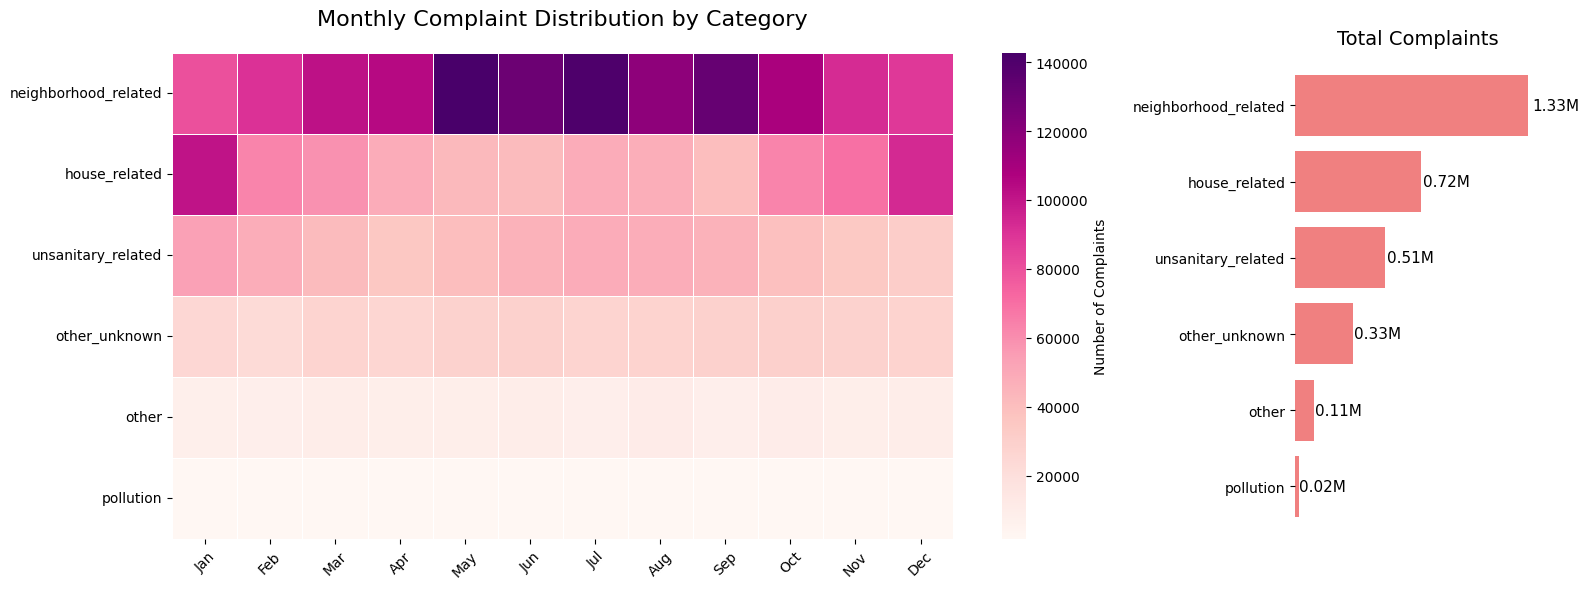

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = data
valid_categories = ['neighborhood_related', 'unsanitary_related', 'other',
       'other_unknown', 'house_related', 'pollution']
df = df[df["category"].isin(valid_categories)]

# Extract Month
df["Created Date"] = pd.to_datetime(df["Created Date"], errors="coerce")
df["month"] = df["Created Date"].dt.month_name().str[:3]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Prepare heatmap data
pivot = df.groupby(["category", "month"]).size().reset_index(name="count")
heatmap_data = pivot.pivot(index="category", columns="month", values="count")
heatmap_data = heatmap_data.reindex(columns=month_order)
heatmap_data = heatmap_data.reindex(index=valid_categories)

# Prepare totals
totals = heatmap_data.sum(axis=1).sort_values(ascending=False)
heatmap_data = heatmap_data.loc[totals.index]

# Create figure with 2 axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), 
                               gridspec_kw={'width_ratios': [4, 1]})

# Heatmap
sns.heatmap(
    heatmap_data, cmap="RdPu", linewidths=0.5, linecolor="white",
    cbar_kws={"label": "Number of Complaints"}, ax=ax1
)
ax1.set_title("Monthly Complaint Distribution by Category", fontsize=16, pad=20)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Right-side total bar chart
ax2.barh(totals.index, totals.values, color='lightcoral')
ax2.invert_yaxis()
ax2.set_title("Total Complaints", fontsize=14)
ax2.set_xlabel("")
ax2.set_xticks([])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Add labels
for i, v in enumerate(totals.values):
    ax2.text(v*1.02, i, f"{v/1e6:.2f}M", va="center", fontsize=11)

plt.tight_layout()
plt.show()


## Visualization 5
Word chart of Description

In [57]:
import geopandas as gpd
import folium
from wordcloud import WordCloud
import base64
from io import BytesIO

# Load NYC shapefile
nyc_gdf = gpd.read_file('map boundaries/borough.geojson')
nyc_gdf = nyc_gdf.rename(columns={'boroname':'boro_name'})

# Keep only relevant columns
nyc_gdf_clean = nyc_gdf[['boro_name', 'geometry']].copy()

# Combine all descriptions per borough
borough_texts = df.groupby('Borough')['Descriptor'].apply(lambda x: ' '.join(x.dropna())).to_dict()
# Create folium map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='cartodbpositron')

# Add borough boundaries
folium.GeoJson(nyc_gdf_clean).add_to(m)

# Overlay word clouds
for idx, row in nyc_gdf_clean.iterrows():
    boro = row['boro_name'].upper()
    if boro in borough_texts:
        wc = WordCloud(width=400, height=400, background_color=None, mode='RGBA').generate(borough_texts[boro])
        # Convert to image in memory
        img_buffer = BytesIO()
        wc.to_image().save(img_buffer, format='PNG')
        img_b64 = base64.b64encode(img_buffer.getvalue()).decode()
        # Overlay at borough bounds
        bounds = [[row.geometry.bounds[1], row.geometry.bounds[0]],
                  [row.geometry.bounds[3], row.geometry.bounds[2]]]
        folium.raster_layers.ImageOverlay(
            image=f"data:image/png;base64,{img_b64}",
            bounds=bounds,
            opacity=0.6,
            interactive=True,
            cross_origin=False
        ).add_to(m)

# Save map
m.save('nyc_wordcloud_map.html')
